# Regresion Lineal

## Librerias

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn import metrics

## Leer archivo

In [4]:
df = pd.read_csv('articulos_ml.csv')
df.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


## Estructura de dataframe  
- Dimension  
- Informacion general  
- Tipos de datos 
- nombre de columnas
- Datos nulos  
- Correlacion 
- estadistica basica

In [5]:
df.shape

(161, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


In [7]:
df.dtypes

Title              object
url                object
Word count          int64
# of Links          int64
# of comments     float64
# Images video      int64
Elapsed days        int64
# Shares            int64
dtype: object

In [8]:
df.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

<AxesSubplot:>

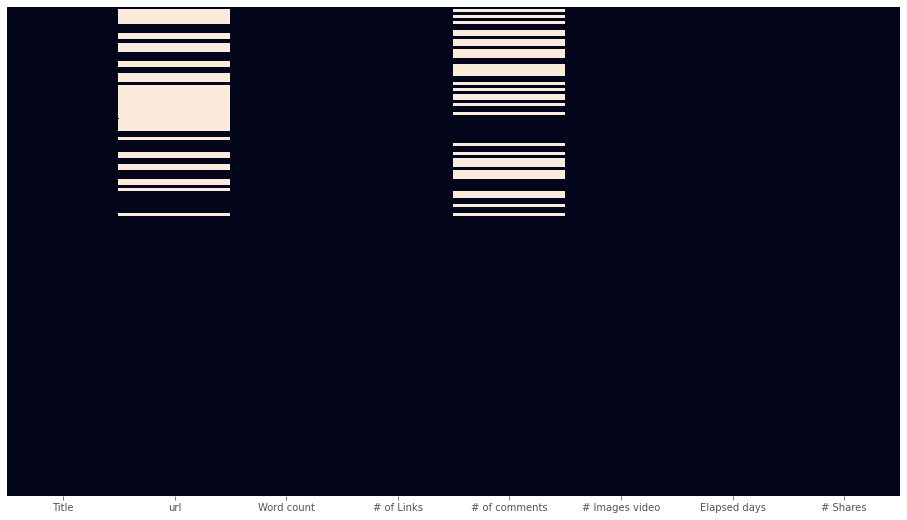

In [26]:
sns.heatmap(df.isnull(), cbar = False, yticklabels=False)

In [13]:
df.isnull().sum()

Title              0
url               39
Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

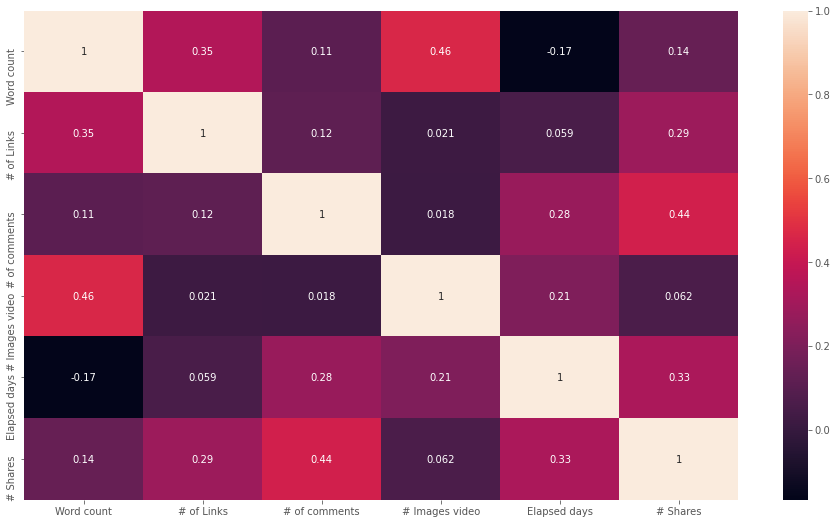

In [27]:
sns.heatmap(df.corr(), annot= True)
plt.show()

In [18]:
df.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


### Dividir datos en:
- Categoricos 
- Numericos

In [22]:
categoricas= df.select_dtypes(include = 'object').columns
numericas = df.select_dtypes(include = 'number').columns

print('columnas categoricas:', categoricas)
print('')
print('')
print('columnas nnumericas:', numericas)

columnas categoricas: Index(['Title', 'url'], dtype='object')


columnas nnumericas: Index(['Word count', '# of Links', '# of comments', '# Images video',
       'Elapsed days', '# Shares'],
      dtype='object')


### Visualizacion General

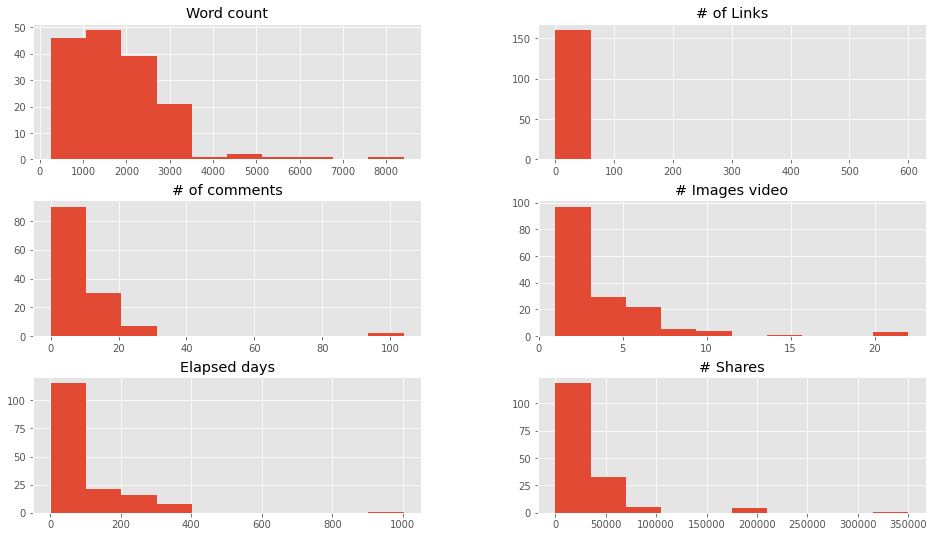

In [28]:
df.drop(categoricas, axis = 1).hist()
plt.show()

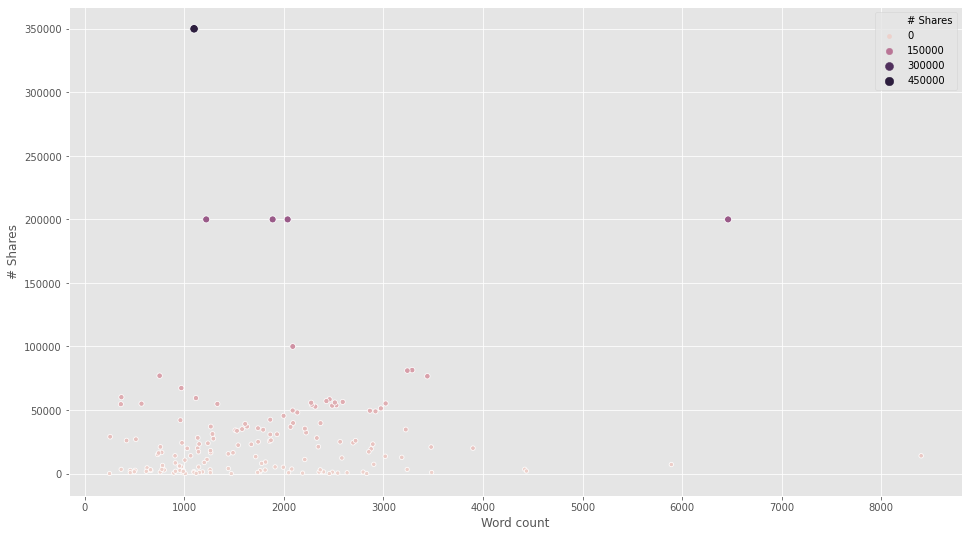

In [43]:
sns.scatterplot(data = df, x = 'Word count', y = '# Shares', hue= '# Shares', size = '# Shares')
plt.show()

# Regresion Lineal Simple 

In [44]:
X = df['Word count'].values
y = df['# Shares'].values
X.shape, y.shape

((161,), (161,))

In [51]:
X = X.reshape(-1, 1)
X.shape

(161, 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

In [48]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [56]:
metrics.mean_squared_error(y_test, y_pred)

3130418081.90338

In [58]:
metrics.r2_score(y_test, y_pred)

-0.1837128409321953

### Prediccion #1

In [67]:
#Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
dos_mil = lr.predict([[2000]])
print(int(dos_mil))

26877


# Regresion Lineal Multiple

In [98]:
X = df.drop(['# of comments','# Shares' ], axis = 1)
X = X.drop(categoricas, axis = 1)
y = df['# Shares']
X.shape, y.shape

((161, 4), (161,))

In [99]:
X.head()

,Word count,# of Links,# Images video,Elapsed days
0,1888,1,2,34
1,1742,9,9,5
2,962,6,1,10
3,1221,3,2,68
4,2039,1,4,131


In [110]:
X.columns

Index(['Word count', '# of Links', '# Images video', 'Elapsed days'], dtype='object')

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136, 4), (25, 4), (136,), (25,))

In [102]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mt_pred = mlr.predict(X_test)

In [103]:
metrics.mean_squared_error(y_test, mt_pred)

1728615381.812582

In [104]:
metrics.r2_score(y_test, mt_pred)

0.03806595733663731

# Guardar el modelo

In [105]:
import pickle

In [106]:
pickle.dump(mlr, open('regresion_lineal.pkl', 'wb'))

In [107]:
from joblib import dump, load

In [108]:
dump(mlr,'Regresion_lineal_multiple.joblib' )

['Regresion_lineal_multiple.joblib']

In [109]:
#cargar el modelo

#modelo = load('RFR.joblib') 